In [1]:
import logging
import pandas as pd
import numpy as np
from numpy import random
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup

from datetime import datetime
from dateutil.relativedelta import relativedelta

from sklearn import metrics

In [2]:
def calc_efficiency_even(changes, real_class, predicted, k):
    
    x = len(changes)
    
    market_pred = []
    market_real = []
    
    exact = 0
    ubstance = 0
    
    mid_only = 0
    mid_db = 0
    
    base_pred  = 1000
    base_real  = 1000
    
    for i in range(0, x):
        real = real_class[i]
        pred = predicted[i]
        
        ubstance += 1/(1 + abs(real - pred))
        
        if real == k/2 - 1 or real == k/2:
            mid_db += 1
            if real == pred:
                mid_only += 1
        
        base_real += base_real * changes[i]
        
        if pred >= k/2:
            base_pred += base_pred * changes[i]
        
        market_real.append(base_real)
        market_pred.append(base_pred)
        
    ubstance = ubstance*100/x
    mid_only = mid_only*100/mid_db
    
    return ubstance, mid_only, market_real, market_pred

def calc_efficiency_odd(changes, real_class, predicted, k):
    
    x = len(changes)
    
    real_res = []
    pred_res = []
    
    market_pred_g = []
    market_pred_ge = []
    market_real = []
    
    exact = 0
    ubstance = 0
    
    mid_only = 0
    mid_db = 0
    
    base_pred_g  = 1000
    base_pred_ge  = 1000
    base_real  = 1000
    
    for i in range(0, x):
        real = real_class[i]
        pred = predicted[i]
        
        ubstance += 1/(1 + abs(real - pred))
        
        if real == k//2:
            mid_db += 1
            if real == pred:
                mid_only += 1
        
        base_real += base_real * changes[i]
        
        if pred > k//2:
            base_pred_g += base_pred_g * changes[i]
            
        if pred >= k//2:
            base_pred_ge += base_pred_ge * changes[i]
        
        
        market_real.append(base_real)
        market_pred_g.append(base_pred_g)
        market_pred_ge.append(base_pred_ge)
    
    ubstance = ubstance*100/x
    mid_only = mid_only*100/mid_db
    
    return ubstance, mid_only, market_real, market_pred_g, market_pred_ge

In [3]:
def calc_efficiency_combined_even(changes, real_class, predicted_nn, predicted_news, k):
    
    x = len(changes)
    
    market_pred = []
    market_real = []
    
    exact = 0
    ubstance = 0
    
    mid_only = 0
    mid_db = 0
    
    base_pred  = 1000
    base_real  = 1000
    
    for i in range(0, x):
        real = real_class[i]
        pred_nn = predicted_nn[i]
        pred_new = predicted_news[i]
            
        if pred_nn == real and pred_new == real:
            exact +=1
        
        if real == k/2 - 1 or real == k/2:
            mid_db += 1
            if real == pred_nn and real == pred_new:
                mid_only += 1
                
        ubstance = 2 / (2 + abs(real - pred_nn) + abs(real - pred_new))
        
        base_real += base_real * changes[i]
        
        if pred_nn >= k/2 and pred_new >= k/2:
            base_pred += base_pred * changes[i]
        
        market_real.append(base_real)
        market_pred.append(base_pred)
        
    ubstance = ubstance*100/x

    mid_only = mid_only*100/mid_db
    
    return ubstance, mid_only, market_real, market_pred

def calc_efficiency_combined_odd(changes, real_class, predicted_nn, predicted_news, k):
    
    x = len(changes)
    
    real_res = []
    pred_res = []
    
    market_pred_g = []
    market_pred_ge = []
    market_real = []
    
    exact = 0
    ubstance = 0
    
    mid_only = 0
    mid_db = 0
    
    base_pred_g  = 1000
    base_pred_ge  = 1000
    base_real  = 1000
    
    for i in range(0, x):
        real = real_class[i]
        pred_nn = predicted_nn[i]
        pred_new = predicted_news[i]
            
        if pred_nn == real and pred_new == real:
            exact +=1
        
        if real == k//2 :
            mid_db += 1
            if real == pred_nn and real == pred_new:
                mid_only += 1
                
        ubstance = 2 / (2 + abs(real - pred_nn) + abs(real - pred_new))
        
        base_real += base_real * changes[i]
        
        if pred_nn > k//2 and pred_new > k//2:
            base_pred_g += base_pred_g * changes[i]
            
        if pred_nn >= k//2 and pred_new >= k//2:
            base_pred_ge += base_pred_ge * changes[i]
        
        
        market_real.append(base_real)
        market_pred_g.append(base_pred_g)
        market_pred_ge.append(base_pred_ge)
    
    ubstance = ubstance*100/x
    mid_only = mid_only*100/mid_db
    
    return ubstance, mid_only, market_real, market_pred_g, market_pred_ge

In [4]:
#UBS
pred_res01_ubs_6class = [2, 4, 2, 3, 3, 0, 4, 2, 2, 2, 3, 2, 3, 4, 3, 2, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3, 4, 4, 4, 3, 2, 1, 2, 2, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 0, 3, 3, 2, 3, 3, 3, 2, 3, 3, 2, 1, 3, 2, 5, 2, 3, 2, 2, 2, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 1, 2, 3, 3, 3, 3, 3, 2, 2, 3, 3, 5, 3, 3, 3, 2, 3, 3, 1, 2, 3, 3, 3, 2, 2, 4, 3, 3, 2, 3, 2, 2, 2, 3, 3, 3, 3, 2, 4, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 2, 2, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 5, 2, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 2, 3, 2, 2, 3, 2, 3]
pred_res02_ubs_4class = [0, 0, 3, 2, 2, 2, 2, 2, 1, 2, 3, 1, 0, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 0, 2, 2, 0, 0, 0, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 3, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 0, 2, 0, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 3, 2, 1, 2, 3, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 0, 1, 2, 2, 1, 1, 1, 3, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 0, 1, 2, 1, 0, 2, 2, 0, 0, 1, 2, 1, 3, 2, 1, 1, 1, 2, 1, 2, 1, 1, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 3, 3, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 0, 1, 2, 3, 3, 2, 2, 3]
pred_res03_ubs_3class = [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 2, 2, 1, 1, 0, 1, 2, 0, 1, 2, 1, 0, 0, 0, 1, 1, 1, 2, 0, 0, 1, 0, 1, 2, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 1, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 1, 1, 0, 0, 1, 0, 2, 2, 2, 1, 1, 2, 0, 0, 1, 0, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0]

nb_6class_ubs_res_num = [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
sgd_6class_ubs_res_num = [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 2, 2, 2]
logreg_6class_ubs_res_num = [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

nb_4class_ubs_res_num = [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
sgd_4class_ubs_res_num = [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1]
logreg_4class_ubs_res_num = [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

nb_3class_ubs_res_num = [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
sgd_3class_ubs_res_num = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
logreg_3class_ubs_res_num = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [5]:
ubs_changes = pd.read_csv("E:/SZAKDOLGOZAT/KUTATAS/CLASSIFICATION/ubs_fully_classified.csv", index_col = "Date", parse_dates = True)
changes_ubs = ubs_changes['Open'].pct_change(periods = 1).fillna(0).values

f_changes = pd.read_csv("E:/SZAKDOLGOZAT/KUTATAS/CLASSIFICATION/F_fully_classified.csv", index_col = "Date", parse_dates = True)
changes_f = f_changes['Open'].pct_change(periods = 1).fillna(0).values

ubs_changes = pd.read_csv("E:/SZAKDOLGOZAT/KUTATAS/CLASSIFICATION/UBS_fully_classified.csv", index_col = "Date", parse_dates = True)
changes_ubs = ubs_changes['Open'].pct_change(periods = 1).fillna(0).values

xom_changes = pd.read_csv("E:/SZAKDOLGOZAT/KUTATAS/CLASSIFICATION/XOM_fully_classified.csv", index_col = "Date", parse_dates = True)
changes_xom = xom_changes['Open'].pct_change(periods = 1).fillna(0).values

In [6]:
market_start_ubs = ubs_changes['Open'].tail(252).head(1).values[0]
market_end_ubs = ubs_changes['Open'].tail(1).values[0]

ubstance_6class_ubs, mid_only_6class_ubs, market_real_6class_ubs, market_pred_6class_ubs = calc_efficiency_even(changes_ubs[-252:], ubs_changes['1_day_even_6class'][-253:-1], logreg_6class_ubs_res_num, 6)
ubstance_4class_ubs, mid_only_4class_ubs, market_real_4class_ubs, market_pred_4class_ubs = calc_efficiency_even(changes_ubs[-252:], ubs_changes['1_day_even_4class'][-253:-1], logreg_4class_ubs_res_num, 4)
ubstance_3class_ubs, mid_only_3class_ubs, market_real_3class_ubs, market_pred_3class_ubs_g, market_pred_3class_ubs_ge = calc_efficiency_odd(changes_ubs[-252:], ubs_changes['1_day_odd_3class'][-253:-1], logreg_3class_ubs_res_num, 3)

finnish_6class_ubs_real = market_real_6class_ubs[251]
finnish_6class_ubs_pred = market_pred_6class_ubs[251]

finnish_4class_ubs_real = market_real_4class_ubs[251]
finnish_4class_ubs_pred = market_pred_4class_ubs[251]

finnish_3class_ubs_real = market_real_6class_ubs[251]
finnish_3class_ubs_pred_g = market_pred_3class_ubs_g[251]
finnish_3class_ubs_pred_ge = market_pred_3class_ubs_ge[251]

ubstance base precision class6:  65.01322751322753
mid only precision class6:       47.12041884816754
ubstance base precision class4:  65.60846560846564
mid only precision class4:       47.64397905759162

market finnish :                 1062.531750760832
predicted finnish class6:        922.4526146903202
predicted finnish class4:        927.2846494690809

market performance class6:       5.34273920257065
win rate to start class6:        -7.754738530967984
win rate to market class6:       -13.183524724810091

market performance class4:       5.34273920257065
win rate to start class4:        -7.271535053091907
win rate to market class4:       -12.728758570735096


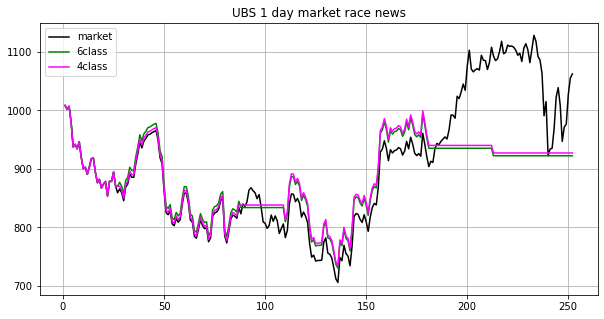

In [7]:
print("ubstance base precision class6: ", ubstance_6class_ubs)
print("mid only precision class6:      ", mid_only_6class_ubs)
print("ubstance base precision class4: ", ubstance_4class_ubs)
print("mid only precision class4:      ", mid_only_4class_ubs)
print()
print("market finnish :                ", finnish_6class_ubs_real)
print("predicted finnish class6:       ", finnish_6class_ubs_pred)
print("predicted finnish class4:       ", finnish_4class_ubs_pred)
print()
print("market performance class6:      ", (market_end_ubs - market_start_ubs)*100/market_start_ubs)
print("win rate to start class6:       ", (finnish_6class_ubs_pred-1000)/10)
print("win rate to market class6:      ", (finnish_6class_ubs_pred-finnish_6class_ubs_real)*100/finnish_6class_ubs_real)
print()
print("market performance class4:      ", (market_end_ubs - market_start_ubs)*100/market_start_ubs)
print("win rate to start class4:       ", (finnish_4class_ubs_pred-1000)/10)
print("win rate to market class4:      ", (finnish_4class_ubs_pred-finnish_4class_ubs_real)*100/finnish_4class_ubs_real)

fig, ax = plt.subplots(figsize=(10, 5))
x = len(market_real_6class_ubs)

plt.grid(visible = True)
plt.title("UBS 1 day market race news")
plt.plot(np.linspace(1,x,x), market_real_6class_ubs, color = '#000000', label = 'market')
plt.plot(np.linspace(1,x,x), market_pred_6class_ubs, color = 'green', label = '6class')
plt.plot(np.linspace(1,x,x), market_pred_4class_ubs, color = 'magenta', label = '4class')
plt.legend()

ubstance base precision class3:    69.77513227513226
mid only precision class3:         66.4

market finnish :                   1062.531750760832
predicted finnish class3 g:        1379.550445226973
predicted finnish class3 ge:       1062.531750760832

market performance class3 g:       5.34273920257065
win rate to start class3 g:        37.95504452269729
win rate to market class3 g:       29.836162000724954

market performance class3 ge:      5.34273920257065
win rate to start class3 ge:       6.253175076083198
win rate to market class3 ge:      0.0


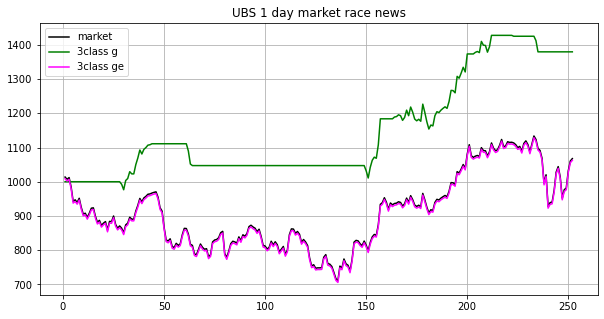

In [8]:
print("ubstance base precision class3:   ", ubstance_3class_ubs)
print("mid only precision class3:        ", mid_only_3class_ubs)
print()
print("market finnish :                  ", finnish_3class_ubs_real)
print("predicted finnish class3 g:       ", finnish_3class_ubs_pred_g)
print("predicted finnish class3 ge:      ", finnish_3class_ubs_pred_ge)
print()
print("market performance class3 g:      ", (market_end_ubs - market_start_ubs)*100/market_start_ubs)
print("win rate to start class3 g:       ", (finnish_3class_ubs_pred_g-1000)/10)
print("win rate to market class3 g:      ", (finnish_3class_ubs_pred_g-finnish_3class_ubs_real)*100/finnish_3class_ubs_real)
print()
print("market performance class3 ge:     ", (market_end_ubs - market_start_ubs)*100/market_start_ubs)
print("win rate to start class3 ge:      ", (finnish_3class_ubs_pred_ge - 1000)/10)
print("win rate to market class3 ge:     ", (finnish_3class_ubs_pred_ge - finnish_3class_ubs_real)*100/finnish_3class_ubs_real)

fig, ax = plt.subplots(figsize=(10, 5))
x = len(market_real_3class_ubs)
for i in range(x):
    market_real_3class_ubs[i]+=5

plt.grid(visible = True)
plt.title("UBS 1 day market race news")
plt.plot(np.linspace(1,x,x), market_real_3class_ubs, color = 'black', label = 'market')
plt.plot(np.linspace(1,x,x), market_pred_3class_ubs_g, color = 'green', label = '3class g')
plt.plot(np.linspace(1,x,x), market_pred_3class_ubs_ge, color = 'magenta', label = '3class ge')
plt.legend()

In [9]:
print((finnish_6class_ubs_pred-finnish_4class_ubs_pred)/10)
print((finnish_3class_ubs_pred_g-finnish_3class_ubs_pred_ge)/10)

-0.48320347787607715
31.70186944661409


In [10]:
market_start_ubs = ubs_changes['Open'].tail(252).head(1).values[0]
market_end_ubs = ubs_changes['Open'].tail(1).values[0]

ubstance_6class_ubs, mid_only_6class_ubs, market_real_6class_ubs, market_pred_6class_ubs = calc_efficiency_combined_even(changes_ubs[-252:], ubs_changes['1_day_even_6class'][-253:-1], pred_res01_ubs_6class, logreg_6class_ubs_res_num, 6)
ubstance_4class_ubs, mid_only_4class_ubs, market_real_4class_ubs, market_pred_4class_ubs = calc_efficiency_combined_even(changes_ubs[-252:], ubs_changes['1_day_even_4class'][-253:-1], pred_res02_ubs_4class, logreg_4class_ubs_res_num, 4)
ubstance_3class_ubs, mid_only_3class_ubs, market_real_3class_ubs, market_pred_3class_ubs_g, market_pred_3class_ubs_ge = calc_efficiency_combined_odd(changes_ubs[-252:], ubs_changes['1_day_odd_3class'][-253:-1], pred_res03_ubs_3class, logreg_3class_ubs_res_num, 3)

finnish_6class_ubs_real = market_real_6class_ubs[251]
finnish_6class_ubs_pred = market_pred_6class_ubs[251]

finnish_4class_ubs_real = market_real_4class_ubs[251]
finnish_4class_ubs_pred = market_pred_4class_ubs[251]

finnish_3class_ubs_real = market_real_6class_ubs[251]
finnish_3class_ubs_pred_g = market_pred_3class_ubs_g[251]
finnish_3class_ubs_pred_ge = market_pred_3class_ubs_ge[251]

ubstance base precision class6:  0.26455026455026454
mid only precision class6:       18.32460732984293
ubstance base precision class4:  0.1984126984126984
mid only precision class4:       18.848167539267017

market finnish :                 1062.531750760832
predicted finnish class6:        1099.1176659288167
predicted finnish class4:        1077.0245687153247

market performance class6:       5.34273920257065
win rate to start class6:        9.911766592881667
win rate to market class6:       3.443277355409581

market performance class4:       5.34273920257065
win rate to start class4:        7.702456871532467
win rate to market class4:       1.3639891649463678


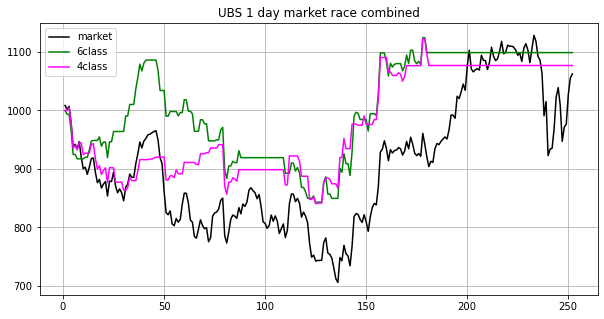

In [11]:
print("ubstance base precision class6: ", ubstance_6class_ubs)
print("mid only precision class6:      ", mid_only_6class_ubs)
print("ubstance base precision class4: ", ubstance_4class_ubs)
print("mid only precision class4:      ", mid_only_4class_ubs)
print()
print("market finnish :                ", finnish_6class_ubs_real)
print("predicted finnish class6:       ", finnish_6class_ubs_pred)
print("predicted finnish class4:       ", finnish_4class_ubs_pred)
print()
print("market performance class6:      ", (market_end_ubs - market_start_ubs)*100/market_start_ubs)
print("win rate to start class6:       ", (finnish_6class_ubs_pred-1000)/10)
print("win rate to market class6:      ", (finnish_6class_ubs_pred-finnish_6class_ubs_real)*100/finnish_6class_ubs_real)
print()
print("market performance class4:      ", (market_end_ubs - market_start_ubs)*100/market_start_ubs)
print("win rate to start class4:       ", (finnish_4class_ubs_pred-1000)/10)
print("win rate to market class4:      ", (finnish_4class_ubs_pred-finnish_4class_ubs_real)*100/finnish_4class_ubs_real)

fig, ax = plt.subplots(figsize=(10, 5))
x = len(market_real_6class_ubs)

plt.grid(visible = True)
plt.title("UBS 1 day market race combined")
plt.plot(np.linspace(1,x,x), market_real_6class_ubs, color = '#000000', label = 'market')
plt.plot(np.linspace(1,x,x), market_pred_6class_ubs, color = 'green', label = '6class')
plt.plot(np.linspace(1,x,x), market_pred_4class_ubs, color = 'magenta', label = '4class')
plt.legend()

ubstance base precision class3:    0.26455026455026454
mid only precision class3:         28.0

market finnish :                   1062.531750760832
predicted finnish class3 g:        1010.902261199676
predicted finnish class3 ge:       806.0317588317715

market performance class3 g:       5.34273920257065
win rate to start class3 g:        1.090226119967599
win rate to market class3 g:       -4.859100871497383

market performance class3 ge:      5.34273920257065
win rate to start class3 ge:       -19.39682411682285
win rate to market class3 ge:      -24.140454320107814


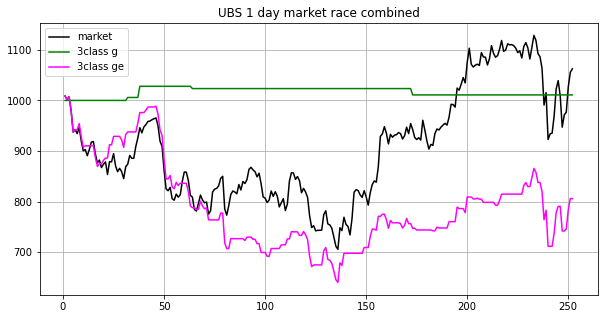

In [12]:
print("ubstance base precision class3:   ", ubstance_3class_ubs)
print("mid only precision class3:        ", mid_only_3class_ubs)
print()
print("market finnish :                  ", finnish_3class_ubs_real)
print("predicted finnish class3 g:       ", finnish_3class_ubs_pred_g)
print("predicted finnish class3 ge:      ", finnish_3class_ubs_pred_ge)
print()
print("market performance class3 g:      ", (market_end_ubs - market_start_ubs)*100/market_start_ubs)
print("win rate to start class3 g:       ", (finnish_3class_ubs_pred_g-1000)/10)
print("win rate to market class3 g:      ", (finnish_3class_ubs_pred_g-finnish_3class_ubs_real)*100/finnish_3class_ubs_real)
print()
print("market performance class3 ge:     ", (market_end_ubs - market_start_ubs)*100/market_start_ubs)
print("win rate to start class3 ge:      ", (finnish_3class_ubs_pred_ge - 1000)/10)
print("win rate to market class3 ge:     ", (finnish_3class_ubs_pred_ge - finnish_3class_ubs_real)*100/finnish_3class_ubs_real)

fig, ax = plt.subplots(figsize=(10, 5))
x = len(market_real_3class_ubs)

plt.grid(visible = True)
plt.title("UBS 1 day market race combined")
plt.plot(np.linspace(1,x,x), market_real_3class_ubs, color = '#000000', label = 'market')
plt.plot(np.linspace(1,x,x), market_pred_3class_ubs_g, color = 'green', label = '3class g')
plt.plot(np.linspace(1,x,x), market_pred_3class_ubs_ge, color = 'magenta', label = '3class ge')
plt.legend()

In [13]:
print((finnish_6class_ubs_pred-finnish_4class_ubs_pred)/10)
print((finnish_3class_ubs_pred_g-finnish_3class_ubs_pred_ge)/10)

2.2093097213492
20.487050236790445
